In [6]:
#!/usr/bin/python3

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
import scipy.integrate as integrate

# sample data
mu = 0
std = 0.01
d = np.random.normal(mu, std, 10000)
# mimic behavior:
d = d[d<= mu]

# apply log and shift
a = abs(min(d)) + 0.001         # latter term as needed
logd = np.array([np.log(x + a) for x in d])

# calculate the pdfs
kde = gaussian_kde(d)
lkde = gaussian_kde(logd)

# CDF of original and of log:
pdf = lambda x: kde(x)[0]
CDF1 = lambda x: integrate.quad(pdf, -np.inf, x)

lpdf = lambda x: lkde(x)[0]
CDF2 = lambda x: integrate.quad(lpdf, -np.inf, x)

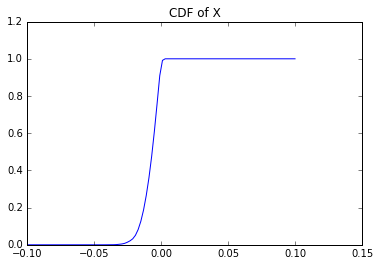

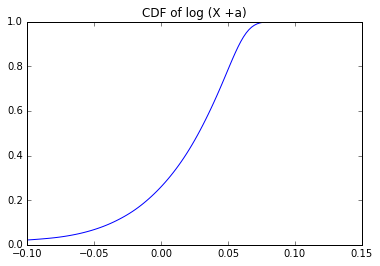

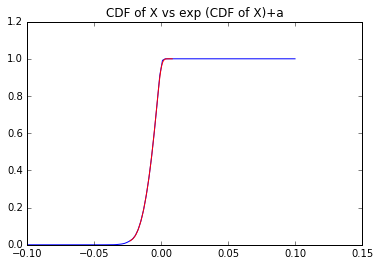

In [7]:
# plot:
sp1 = np.linspace( -0.1, 0.1, 100 )
out1 = [CDF1(p) for p in sp1]
sp2 = np.linspace( -4, -3, 100 ) 
out2 = [CDF2(p) for p in sp2] # do what you want with this here
s = np.array([np.exp(u) -a for u in sp2]) # transform back
plt.figure(1)
plt.plot(sp1, out1)
plt.title("CDF of X")
plt.figure(2)
plt.plot(sp1, out2)
plt.title("CDF of log (X +a)")
plt.figure(3)
plt.plot(sp1, out1)
plt.plot(s, out2)
plt.title("CDF of X vs exp (CDF of X)+a")
plt.show()